### Data exploratory analysis

### Summary

 - Methane yield is not normally distributed (Shapiro-Wilk normality test p-value = 0.04032, I do not consider this as strong hint on normality, however it is still less than 0.05)

**Pretreatment:**

- There is no basis to reject the hypothesis that pretreated and not pretreated do not differ significantly (KS p-value = 0.1184)
- T-test for mean values does not show significant differences in mean values (samples can be considered as large) p-value = 0.09952
- If the "food waste" outlier is removed then the T-test results in significant outcome (p-value = 0.00549). 
- ANOVA does not indicate the influence of the pretreatment to Methane yield (p-value = 0.434) \[the data is sparse, and not well balanced, the outcome is not robust\]

**Co-substrate**

 - There is no basis to reject the hypothesis that with and without the co-substrate do not differ significantly (KS p-value = 0.2404)
 
 - The T-test does not show significant differences between with and without cosubstrate (p-value = 0,2257)
 - ANOVA performed for co-substrates with count above 2 (including None == no co-substrate) does not show significant influence (p-value = 0,0859). The outcome may be biased due to unbalanced set, and clearly category None is very spread.
 - However ANOVA gives significant outcomes, when None cateogory is excluded (p-value = 5,68e-05). Only categories with count above 2 were included \['Corn stover', 'Manure', 'pretreated meadow grass silage', 'Wheat straw'\]
  
**Conclusion**  

There are no clear differences between the methane yield distribution in groups with or without co-substrates and pretreated or not pretreated. The dataset is quite small and very sparse in terms of comparing variables *Co-substrate*, *pretreatment*, and *Substrate*. Taking into consideration the fact, that possibly the most influencial factor is *Substrate* (ANOVA p-value = 0,0248) the analysis is not very robust in terms of analysis of the other factors. In order to obtain certain outcomes improved dataset would be required (I know it is not viable). What can be stated:

 - Methane yield is significantly influenced by the *Substrate*
 - Methane yield is significantly influenced by the *Co-substrate* in the group with co-substrate added
 - There are no significant differences between distribution of samples collected from pretreated and not pretreated populations
 - There are no significant differences between distribution of samples collected from with and without co-substrate
 
 Taking into account the fact, all the data was collected, the metaanalysis should be based on the expert knowledge. Due to the abovementioned glitches of the dataset, it is rather unlikely that statistics will provide much support to the research. Exception is the exploratory data visualization.


In [3]:
library(openxlsx)
library(tidyverse)
library(ggrepel)

In [4]:
df <- read.xlsx('Biogas _Tableau_prepared.xlsx',sheet = 1)
nrow(df)
df$Substrate <- factor(df$Substrate,ordered = TRUE , levels = rev(c('chicken manure', 'cow manure', 'pig manure','horse manure', 'mink manure', 'sewage sludge', 'food waste', 
  'fruit/vegetable waste','microalgal biomass', 'meadow grass silage', 'harvested meadow grass', 'napier grass',
  'spruce', 'birch', 'sugar beet', 'straw','oat straw', 'rice straw', 'corn straw', 'wheat straw', 'soybean straw',
   'sunflower stalk','sunflower stock' )))
df$pretreated <- ifelse(df$Pretreatment == "none",FALSE,TRUE)
df$cosubstrated <- ifelse(df$`Co-substrate` == "none",FALSE,TRUE)
df$pretreatment <- factor(df$Pretreatment,ordered = TRUE, 
                          levels = rev(c("none", "biological", "chemical", "mechanical", "thermal", "thermo-alkaline","thermo-chemical")))
df$pretreatment.detail <- factor(df$Pretreatment.detail,ordered = TRUE, 
                                 levels = rev(c("none", "biological", "chemical", "mechanical", "extrusion", "thermal","hydrothermal", "thermo-alkaline","thermo-chemical","steam explosion")))
head(df)

[1] 104

Pretreatment,Pretreatment.detail,Substrate,Co-substrate,Methane.yield,Source,Comment,pretreated,cosubstrated,pretreatment,pretreatment.detail
thermo-alkaline,thermo-alkaline,microalgal biomass,wheat straw,290,"Solé-Bundó.M et al.,2017",NA,TRUE,TRUE,thermo-alkaline,thermo-alkaline
thermo-alkaline,thermo-alkaline,microalgal biomass,wheat straw,295,"Solé-Bundó.M et al.,2017",NA,TRUE,TRUE,thermo-alkaline,thermo-alkaline
thermo-alkaline,thermo-alkaline,microalgal biomass,wheat straw,300,"Solé-Bundó.M et al.,2017",NA,TRUE,TRUE,thermo-alkaline,thermo-alkaline
thermo-alkaline,thermo-alkaline,wheat straw,none,304,"Solé-Bundó.M et al.,2017",NA,TRUE,FALSE,thermo-alkaline,thermo-alkaline
none,none,wheat straw,none,279,"Solé-Bundó.M et al.,2017",NA,FALSE,FALSE,none,none
none,none,microalgal biomass,none,264,"Solé-Bundó.M et al.,2017",NA,FALSE,FALSE,none,none


### Normality testing and histograms

In [39]:
shapiro.test(df$Methane.yield)


	Shapiro-Wilk normality test

data:  df$Methane.yield
W = 0.97428, p-value = 0.04032


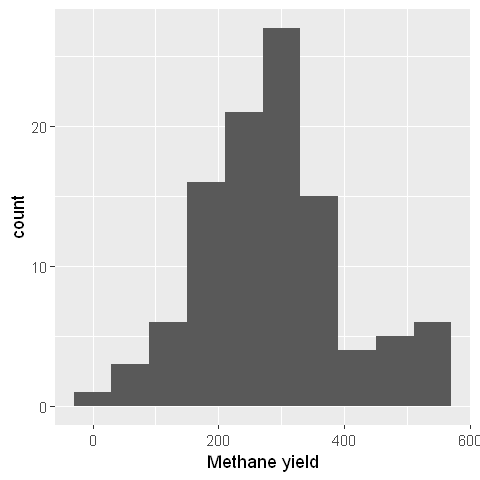

In [40]:
options(repr.plot.width = 4, repr.plot.height = 4)
ggplot(data=df, aes(df$Methane.yield)) + geom_histogram(bins = round(sqrt(nrow(df)))) + xlab("Methane yield")

### Exploring the influence of the pretreatment

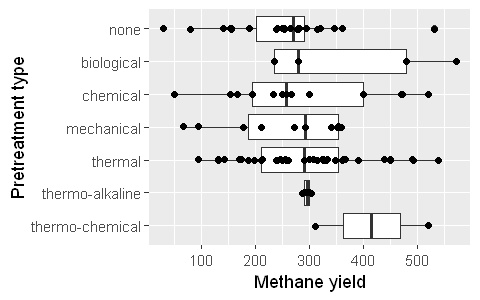

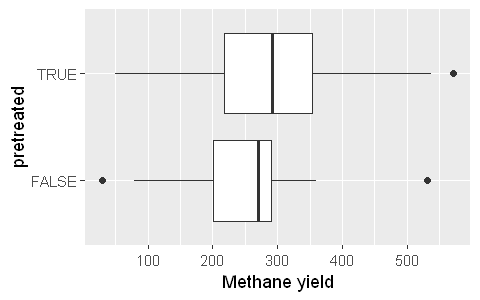

In [41]:
options(repr.plot.width = 4, repr.plot.height = 2.5)

ggplot(data=df) + geom_boxplot(aes(x = pretreatment, y = Methane.yield)) + 
              coord_flip() + geom_jitter(aes(x = pretreatment, y = Methane.yield),width = 0.01) + 
                     ylab("Methane yield") + xlab("Pretreatment type")

ggplot(data=df, aes(x = pretreated, y = df$Methane.yield)) + geom_boxplot() + coord_flip() + ylab("Methane yield") 

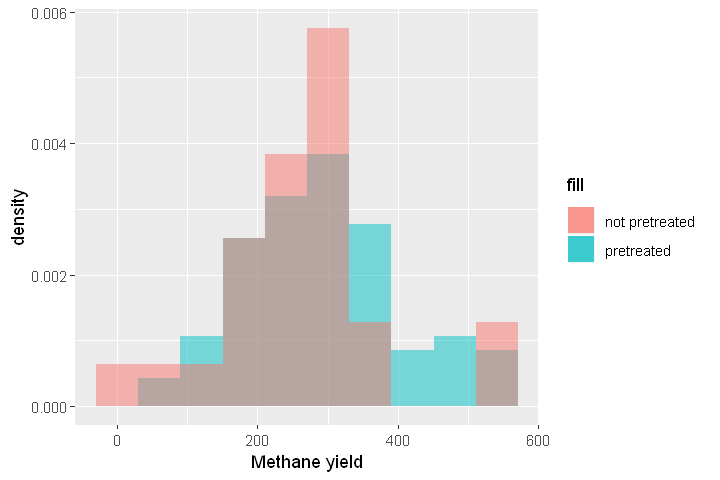

In [42]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot() + geom_histogram(alpha = 0.5, aes(df[df$pretreated == TRUE,]$Methane.yield, y = ..density.., fill = "pretreated"), bins = 10) + geom_histogram(alpha = 0.5, aes(df[df$pretreated == FALSE,]$Methane.yield, y = ..density.., fill = "not pretreated"), bins = 10) + xlab("Methane yield")

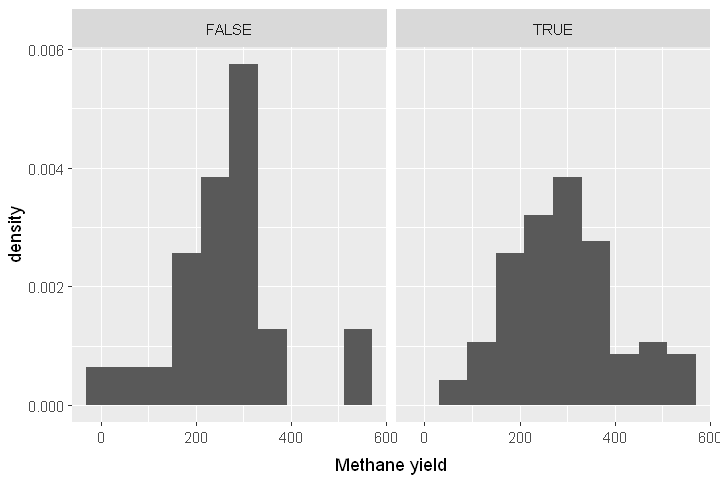

In [43]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data=df, aes(df$Methane.yield, y = ..density..)) + geom_histogram(bins = 10) + facet_wrap( pretreated ~ .) + xlab("Methane yield")

In [44]:
ks.test(df[df$pretreated == TRUE,]$Methane.yield,df[df$pretreated == FALSE,]$Methane.yield)

Warning message in ks.test(df[df$pretreated == TRUE, ]$Methane.yield, df[df$pretreated == :
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  df[df$pretreated == TRUE, ]$Methane.yield and df[df$pretreated == FALSE, ]$Methane.yield
D = 0.26923, p-value = 0.1184
alternative hypothesis: two-sided


In [45]:
X <- df[df$pretreated == FALSE,"Methane.yield"]
Y <- df[df$pretreated == TRUE,"Methane.yield"]
t.test(X, Y,alternative =  "less")


	Welch Two Sample t-test

data:  X and Y
t = -1.3041, df = 43.528, p-value = 0.09952
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 9.599149
sample estimates:
mean of x mean of y 
 260.5588  293.8087 


**However if the outlier is removed, the difference is significant**

In [47]:
X <- df[df$pretreated == FALSE & df$Substrate != "food waste","Methane.yield"]
Y <- df[df$pretreated == TRUE,"Methane.yield"]
t.test(X, Y,alternative =  "less")


	Welch Two Sample t-test

data:  X and Y
t = -2.6364, df = 52.766, p-value = 0.00549
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -20.36858
sample estimates:
mean of x mean of y 
 237.9971  293.8087 


In [50]:
pretreated_anova <- aov(Methane.yield ~ pretreatment, data = df[df$pretreated == TRUE,c("pretreatment","Methane.yield")])
summary(pretreated_anova)

             Df Sum Sq Mean Sq F value Pr(>F)
pretreatment  5  64021   12804   0.984  0.434
Residuals    72 936818   13011               

In [54]:
pretreated_notpretreated_anova <- aov(Methane.yield ~ pretreatment, data = df[,c("pretreatment","Methane.yield")])
summary(pretreated_notpretreated_anova)

             Df  Sum Sq Mean Sq F value Pr(>F)
pretreatment  6   85579   14263   1.106  0.365
Residuals    97 1251030   12897               

### Exploring the influence of the co-substrate

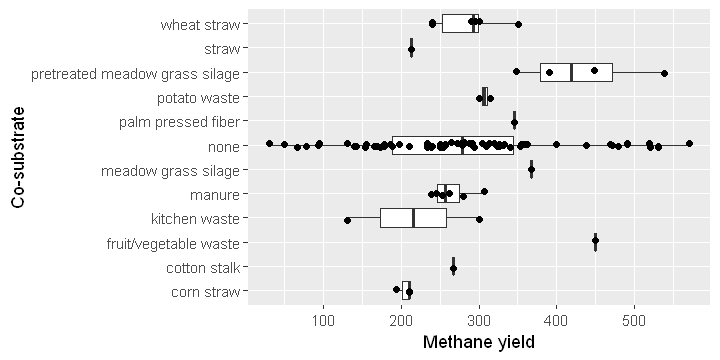

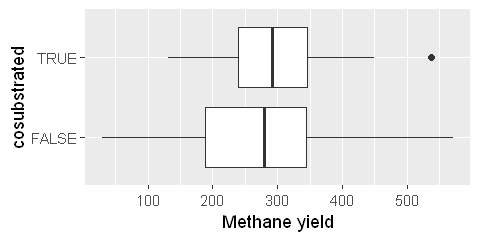

In [55]:
options(repr.plot.width = 6, repr.plot.height = 3)
ggplot(data=df, aes(x = `Co-substrate`, y = Methane.yield)) + geom_boxplot() + coord_flip() + geom_jitter(width = 0.1) + ylab("Methane yield") + xlab("Co-substrate")
options(repr.plot.width = 4, repr.plot.height = 2)
ggplot(data=df, aes(x = cosubstrated, y = df$Methane.yield)) + geom_boxplot() + coord_flip() + ylab("Methane yield")

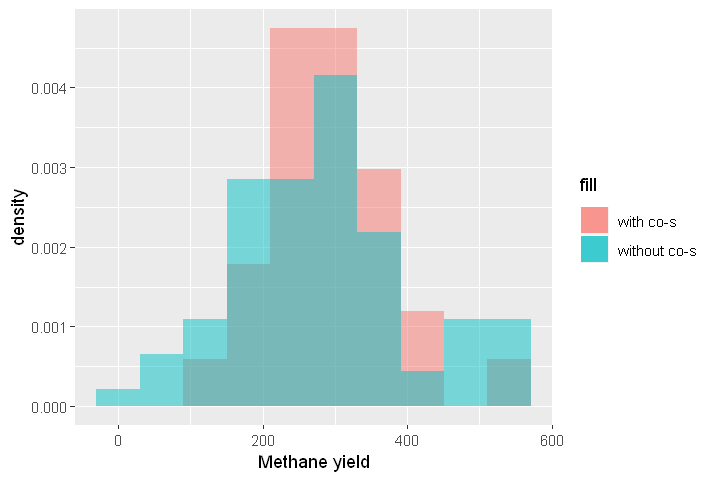

In [56]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot() + geom_histogram(alpha = 0.5, aes(df[df$cosubstrated == TRUE,]$Methane.yield, y = ..density.., fill = "with co-s"), bins = 10) + geom_histogram(alpha = 0.5, aes(df[df$cosubstrated == FALSE,]$Methane.yield, y = ..density.., fill = "without co-s"), bins = 10) + xlab("Methane yield")

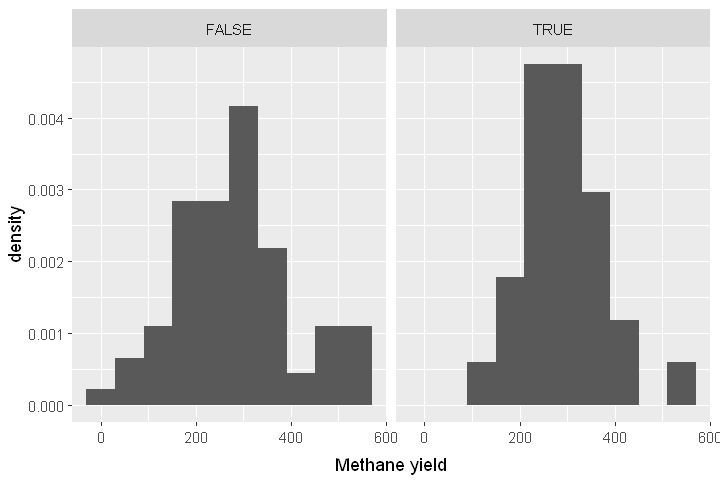

In [57]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data=df, aes(df$Methane.yield, y = ..density..)) + geom_histogram(bins = 10) + facet_wrap( cosubstrated ~ .) + xlab("Methane yield")

In [58]:
ks.test(df[df$cosubstrated == TRUE,]$Methane.yield,df[df$cosubstrated == FALSE,]$Methane.yield)

Warning message in ks.test(df[df$cosubstrated == TRUE, ]$Methane.yield, df[df$cosubstrated == :
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  df[df$cosubstrated == TRUE, ]$Methane.yield and df[df$cosubstrated == FALSE, ]$Methane.yield
D = 0.22744, p-value = 0.2404
alternative hypothesis: two-sided


In [59]:
X <- df[df$cosubstrated == FALSE,"Methane.yield"]
Y <- df[df$cosubstrated == TRUE,"Methane.yield"]
t.test(X, Y,alternative =  "less")


	Welch Two Sample t-test

data:  X and Y
t = -0.75429, df = 67.931, p-value = 0.2266
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 19.75001
sample estimates:
mean of x mean of y 
 281.1047  297.4161 


**Testing ANOVA**

In [60]:
cs_df <- df %>% group_by(`Co-substrate`) %>% summarise(n=n()) %>% filter(n>2)
cs_df

Co-substrate,n
corn straw,3
manure,6
none,76
pretreated meadow grass silage,4
wheat straw,6


In [61]:
cosubs_none <- cs_df$`Co-substrate`
cosubs_none

cosubstrated_anova <- aov(Methane.yield ~ `Co-substrate`, data = filter(df, `Co-substrate` %in% cosubs_none))
summary(cosubstrated_anova) # that is biased by the unbalanced dataset n(None) >> n(others)

[1] "corn straw"                     "manure"                        
[3] "none"                           "pretreated meadow grass silage"
[5] "wheat straw"

               Df  Sum Sq Mean Sq F value Pr(>F)  
`Co-substrate`  4  108693   27173   2.109 0.0862 .
Residuals      90 1159648   12885                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [63]:
cosubs <- cs_df[cs_df$`Co-substrate` != 'none',]$`Co-substrate`
cosubs

cosubstrated_anova1 <- aov(Methane.yield ~ `Co-substrate`, data = filter(df, `Co-substrate` %in% cosubs))
summary(cosubstrated_anova1)

[1] "corn straw"                     "manure"                        
[3] "pretreated meadow grass silage" "wheat straw"

               Df Sum Sq Mean Sq F value   Pr(>F)    
`Co-substrate`  3 104970   34990   16.14 5.81e-05 ***
Residuals      15  32518    2168                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Not enough data to cross-compare cosubstrated and pretreated

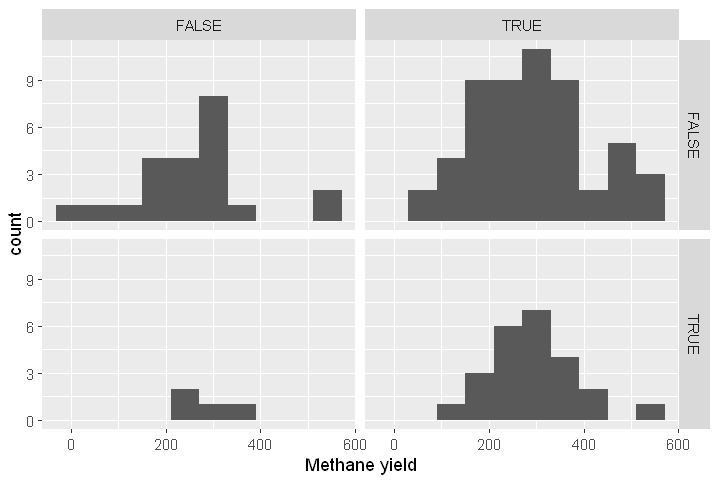

In [64]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data=df, aes(df$Methane.yield)) + geom_histogram(bins = 10) + facet_grid( cosubstrated ~ pretreated) + xlab("Methane yield")

**Influence of substrate**

In [82]:
s_df <- df %>% group_by(`Substrate`) %>% summarise(n=n()) %>% filter(n>2)
s_df

subs <- s_df$Substrate
subs

substrates_anova <- aov(Methane.yield ~ Substrate, data = filter(df, Substrate %in% subs))
summary(substrates_anova)

Substrate,n
wheat straw,8
corn straw,6
rice straw,4
meadow grass silage,4
microalgal biomass,5
fruit/vegetable waste,4
food waste,6
sewage sludge,22
pig manure,13
cow manure,11


[1] wheat straw           corn straw            rice straw           
 [4] meadow grass silage   microalgal biomass    fruit/vegetable waste
 [7] food waste            sewage sludge         pig manure           
[10] cow manure           
23 Levels: sunflower stock < sunflower stalk < ... < chicken manure

            Df Sum Sq Mean Sq F value Pr(>F)  
Substrate    9 197782   21976   1.873 0.0696 .
Residuals   73 856534   11733                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

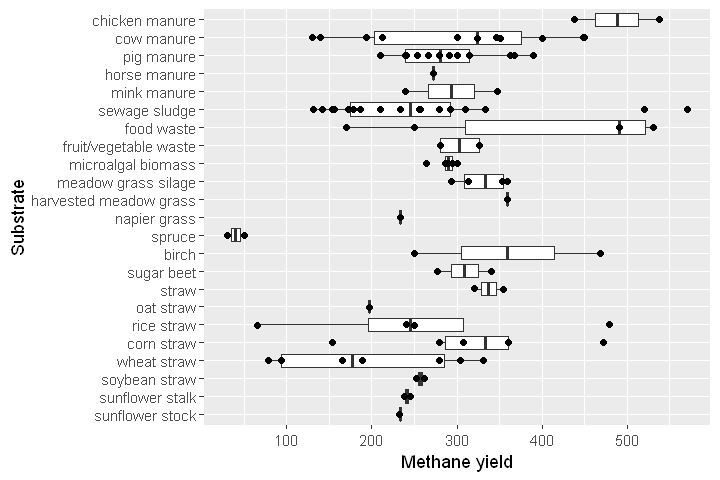

In [83]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data=df) + geom_boxplot(aes(x = Substrate, y = Methane.yield)) + coord_flip() + geom_jitter(aes(x = Substrate, y = Methane.yield),width = 0.01) + ylab("Methane yield") + xlab("Substrate")

Substrate,n
sunflower stock,1
sunflower stalk,2
soybean straw,2
wheat straw,8
corn straw,6
rice straw,4
oat straw,1
straw,2
sugar beet,2
birch,2


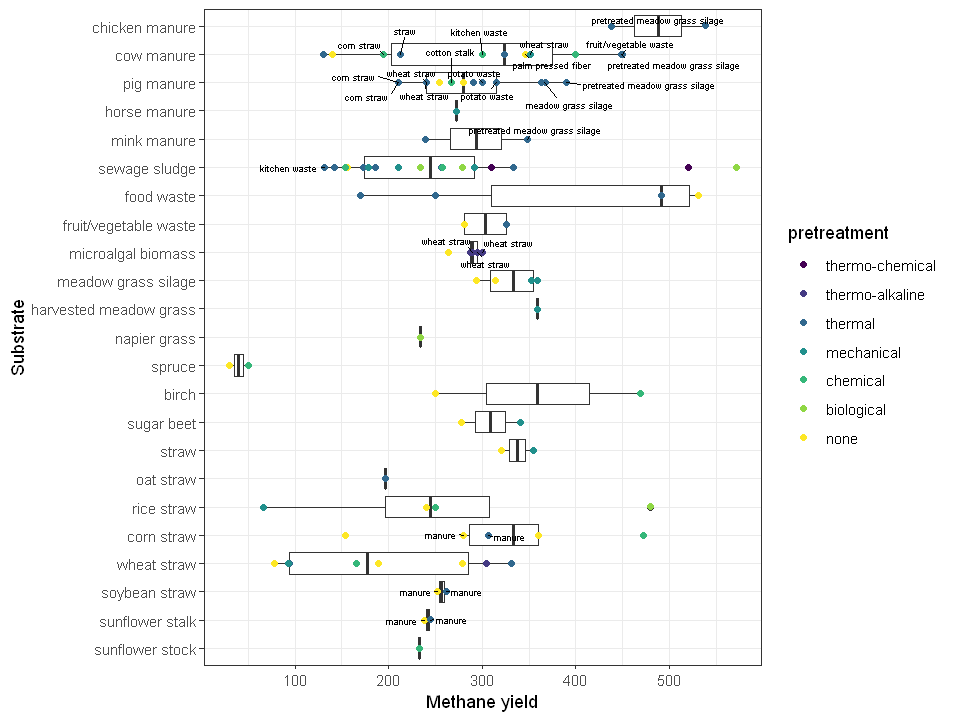

In [157]:
options(repr.plot.width = 8, repr.plot.height = 6)
p <- ggplot(data=df) + geom_boxplot(aes(x = Substrate, y = Methane.yield)) + 
         geom_jitter(aes(x = Substrate, y = Methane.yield, col = pretreatment),width = 0.01) + 
             scale_shape_manual(values=c(0,1,17,5,6,9,15)) + coord_flip() + ylab("Methane yield") + xlab("Substrate") +
                 theme_bw() + geom_text_repel(aes(x = Substrate, y = Methane.yield, label = ifelse(`Co-substrate`=="none","",`Co-substrate`)),
                                              size=2,min.segment.length = 0)
p
ggsave("SVG/plot.svg",plot=p,width=8, height=6)

df %>% group_by(`Substrate`) %>% summarise(n=n())

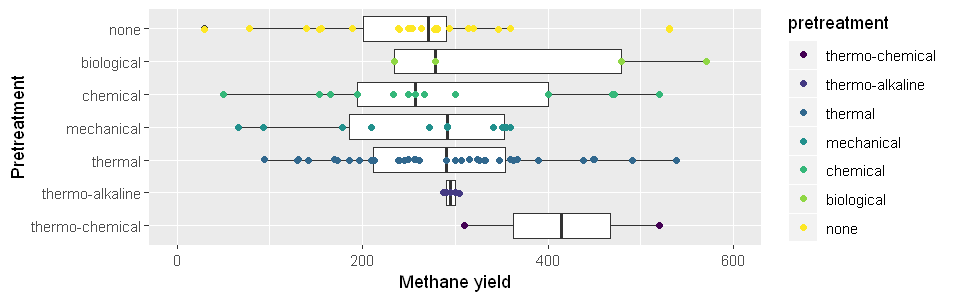

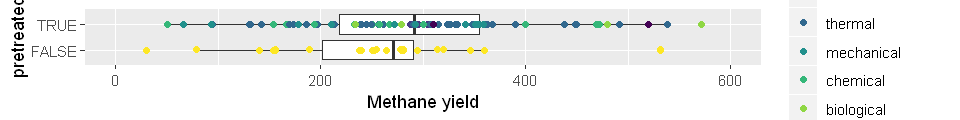

In [13]:
options(repr.plot.width = 8, repr.plot.height = 2.5)

p <- ggplot(data=df) + geom_boxplot(aes(x = pretreatment, y = Methane.yield)) + 
              coord_flip() + geom_jitter(aes(x = pretreatment, y = Methane.yield,col = pretreatment),width = 0.01) + 
                     ylab("Methane yield") + xlab("Pretreatment")+ ylim(0,600)
p
ggsave("SVG/pretreatment.svg",plot=p,width=8, height=2.5)

options(repr.plot.width = 8, repr.plot.height = 1)
p <- ggplot(data=df, aes(x = pretreated, y = df$Methane.yield)) + geom_boxplot() + 
     geom_jitter(aes(x = pretreated, y = Methane.yield,col = pretreatment),width = 0.01) + 
     ylab("Methane yield")+ coord_flip() + ylim(0,600)
p
ggsave("SVG/pretreatment1.svg",plot=p,width=8, height=6)

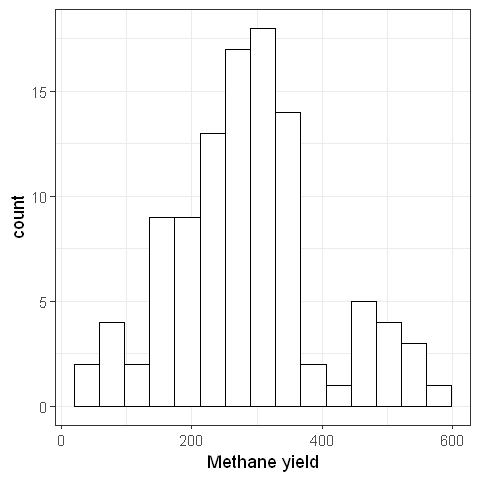

In [156]:
options(repr.plot.width = 4, repr.plot.height = 4)
p <- ggplot(data=df, aes(df$Methane.yield)) + geom_histogram(bins = 15,fill="white",col="black") + 
         xlab("Methane yield") + theme_bw()

p
ggsave("SVG/hist.svg",plot=p,width=4, height=4)

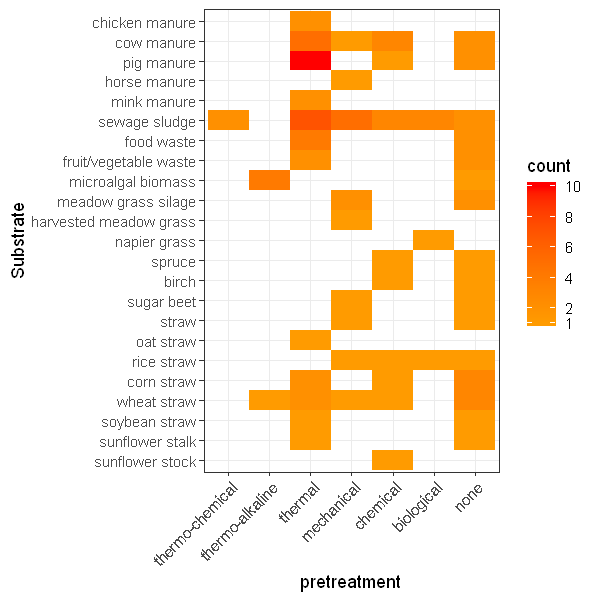

In [6]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df,aes(y=Substrate,x=pretreatment)) + geom_bin2d() + 
    scale_fill_gradient2(low="white",mid="orange", high="red",breaks = c(1,2,4,6,8,10)) + 
        theme_bw() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [150]:
round(sqrt(nrow(df)))

[1] 10